In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Analysis Flow Chart

<img src="./flowchart.png" alt="Flowchart" width="500"/>


In [2]:
# dimensions of data
n_samples = 16071
n_latitudes = 101 
n_longitudes = 161
shape = (n_samples, n_latitudes, n_longitudes)

In [3]:
# load data
ds = xr.open_dataset('.\\slp.nc') # change to 't2m.nc' for temperature data
# visualize dataset content
print(ds)

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 16071, longitude: 161, latitude: 101)
Coordinates:
  * time       (time) datetime64[ns] 129kB 1979-01-01T11:30:00 ... 2022-12-31...
  * longitude  (longitude) float32 644B 70.0 70.5 71.0 ... 149.0 149.5 150.0
  * latitude   (latitude) float32 404B 40.0 39.5 39.0 38.5 ... -9.0 -9.5 -10.0
Data variables:
    msl        (time, latitude, longitude) float32 1GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    history:      Mon Feb 05 11:54:26 2024: cdo -b 32 mergetime daily_slp1979...
    Conventions:  CF-1.6
    frequency:    day
    CDO:          Climate Data Operators version 1.9.4rc1 (http://mpimet.mpg....


In [4]:
# get data values
da = ds['msl'] # 'msl' is the variable name for slp, change to 't2m' for temperature data
x = da.values
print(x)
print(x.shape)

[[[101943.086 101989.92  102015.8   ... 101418.664 101386.12  101350.54 ]
  [102027.68  102279.96  102562.85  ... 101468.    101434.67  101401.91 ]
  [102285.22  102462.836 102559.64  ... 101519.43  101490.62  101461.56 ]
  ...
  [101111.01  101109.06  101107.54  ... 100526.9   100510.74  100511.875]
  [101111.2   101109.19  101108.91  ... 100658.695 100566.766 100546.74 ]
  [101112.44  101111.15  101109.95  ... 100591.01  100736.766 100558.74 ]]

 [[101900.16  101947.945 101967.85  ... 101238.516 101203.34  101165.47 ]
  [102038.18  102291.54  102573.29  ... 101279.555 101243.47  101208.89 ]
  [102372.15  102490.29  102545.21  ... 101317.945 101284.52  101252.086]
  ...
  [101124.08  101122.53  101119.734 ... 100458.69  100445.914 100452.65 ]
  [101126.08  101124.484 101118.62  ... 100604.086 100507.03  100489.336]
  [101126.445 101124.984 101117.35  ... 100552.    100682.836 100492.414]]

 [[101973.01  102020.375 102048.44  ... 101409.29  101399.12  101386.37 ]
  [102356.09  102605.1

In [5]:
# get time snapshots
da = ds['time']
t = da.values
print(t)

['1979-01-01T11:30:00.000000000' '1979-01-02T11:30:00.000000000'
 '1979-01-03T11:30:00.000000000' ... '2022-12-29T11:30:00.000000000'
 '2022-12-30T11:30:00.000000000' '2022-12-31T11:30:00.000000000']


In [6]:
# get longitude values
da = ds['longitude']
lon = da.values
print(lon)

[ 70.   70.5  71.   71.5  72.   72.5  73.   73.5  74.   74.5  75.   75.5
  76.   76.5  77.   77.5  78.   78.5  79.   79.5  80.   80.5  81.   81.5
  82.   82.5  83.   83.5  84.   84.5  85.   85.5  86.   86.5  87.   87.5
  88.   88.5  89.   89.5  90.   90.5  91.   91.5  92.   92.5  93.   93.5
  94.   94.5  95.   95.5  96.   96.5  97.   97.5  98.   98.5  99.   99.5
 100.  100.5 101.  101.5 102.  102.5 103.  103.5 104.  104.5 105.  105.5
 106.  106.5 107.  107.5 108.  108.5 109.  109.5 110.  110.5 111.  111.5
 112.  112.5 113.  113.5 114.  114.5 115.  115.5 116.  116.5 117.  117.5
 118.  118.5 119.  119.5 120.  120.5 121.  121.5 122.  122.5 123.  123.5
 124.  124.5 125.  125.5 126.  126.5 127.  127.5 128.  128.5 129.  129.5
 130.  130.5 131.  131.5 132.  132.5 133.  133.5 134.  134.5 135.  135.5
 136.  136.5 137.  137.5 138.  138.5 139.  139.5 140.  140.5 141.  141.5
 142.  142.5 143.  143.5 144.  144.5 145.  145.5 146.  146.5 147.  147.5
 148.  148.5 149.  149.5 150. ]


In [7]:
# get latitude values 
da = ds['latitude']
lat = da.values
print(lat)

[ 40.   39.5  39.   38.5  38.   37.5  37.   36.5  36.   35.5  35.   34.5
  34.   33.5  33.   32.5  32.   31.5  31.   30.5  30.   29.5  29.   28.5
  28.   27.5  27.   26.5  26.   25.5  25.   24.5  24.   23.5  23.   22.5
  22.   21.5  21.   20.5  20.   19.5  19.   18.5  18.   17.5  17.   16.5
  16.   15.5  15.   14.5  14.   13.5  13.   12.5  12.   11.5  11.   10.5
  10.    9.5   9.    8.5   8.    7.5   7.    6.5   6.    5.5   5.    4.5
   4.    3.5   3.    2.5   2.    1.5   1.    0.5   0.   -0.5  -1.   -1.5
  -2.   -2.5  -3.   -3.5  -4.   -4.5  -5.   -5.5  -6.   -6.5  -7.   -7.5
  -8.   -8.5  -9.   -9.5 -10. ]


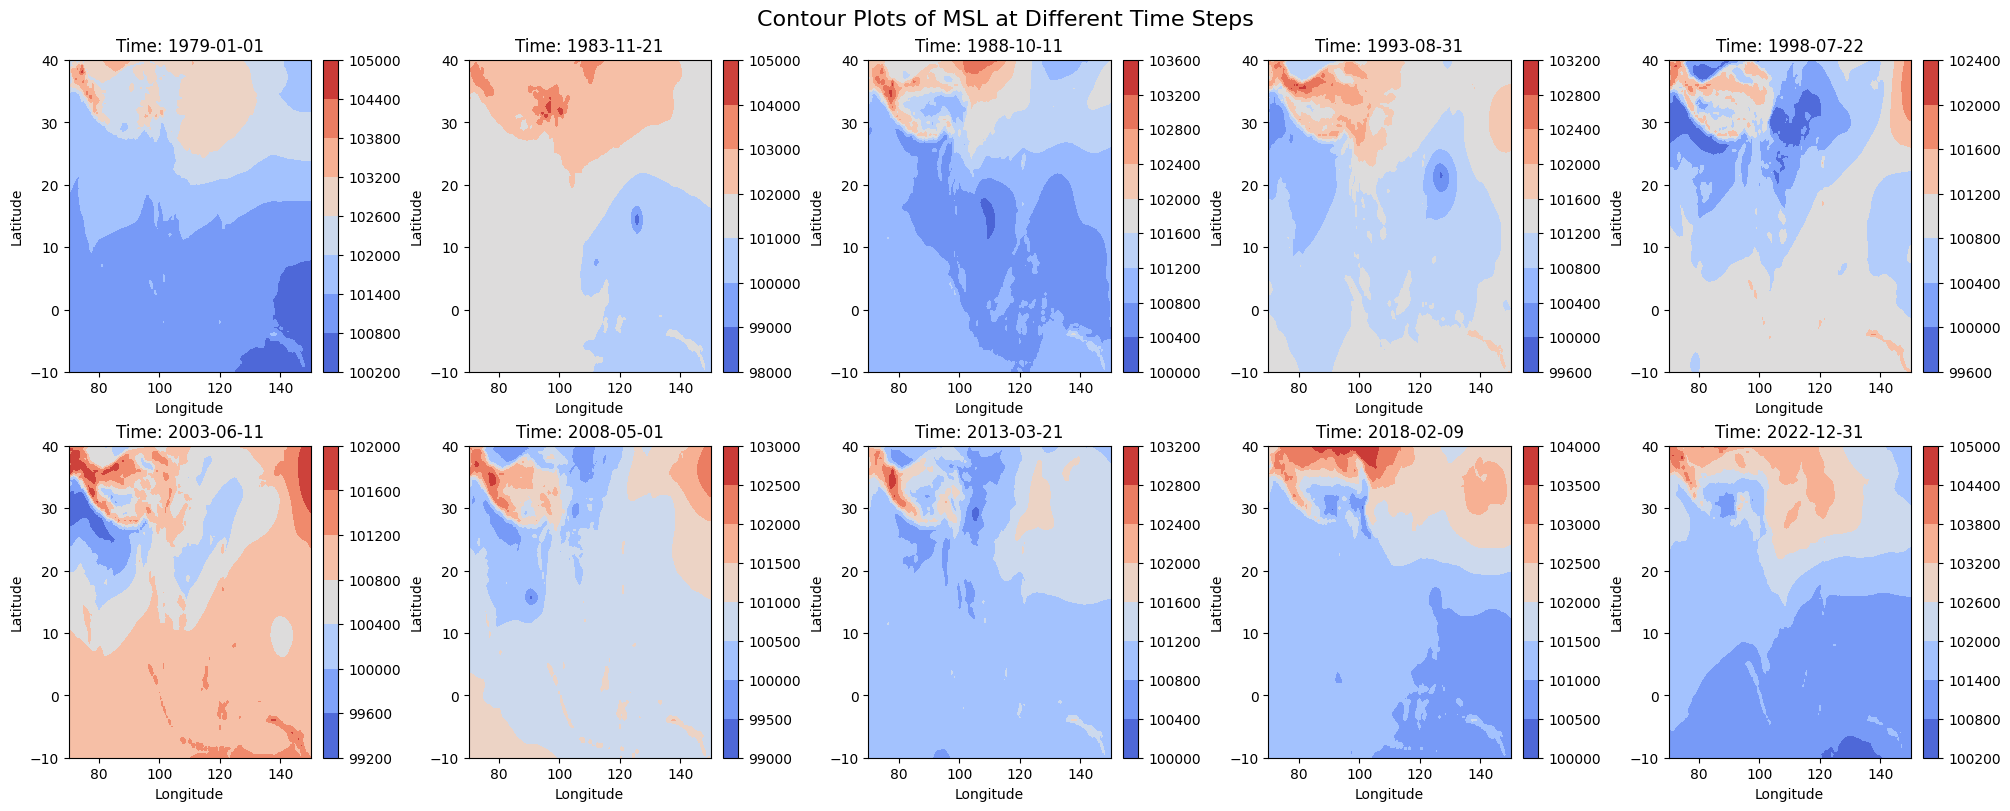

In [8]:
time_indices = np.linspace(0, len(ds.time) - 1, 10, dtype=int)
selected_times = ds.time[time_indices]

# Create figure and axes for 2x5 subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), constrained_layout=True)

# Plot each selected time step
for ax, time in zip(axes.flat, selected_times):
    data_slice = ds.msl.sel(time=time)  # Select data for the given time

    # Create contour plot
    contour = ax.contourf(ds.longitude, ds.latitude, data_slice, cmap="coolwarm")
    fig.colorbar(contour, ax=ax)

    # Titles and labels
    ax.set_title(f"Time: {np.datetime_as_string(time.values, unit='D')}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Show the plot
plt.suptitle("Contour Plots of MSL at Different Time Steps", fontsize=16)
plt.show()

### Following is done to show there is a yearly periodicity for every 12 months

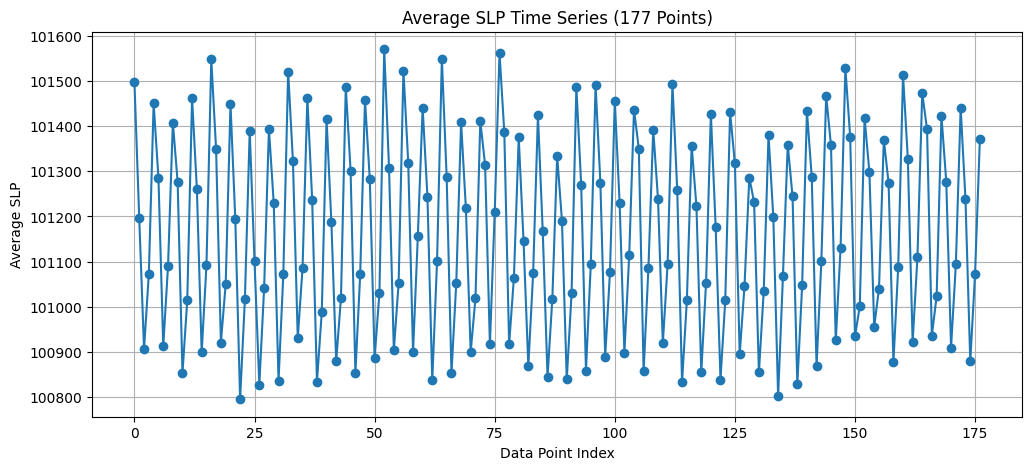

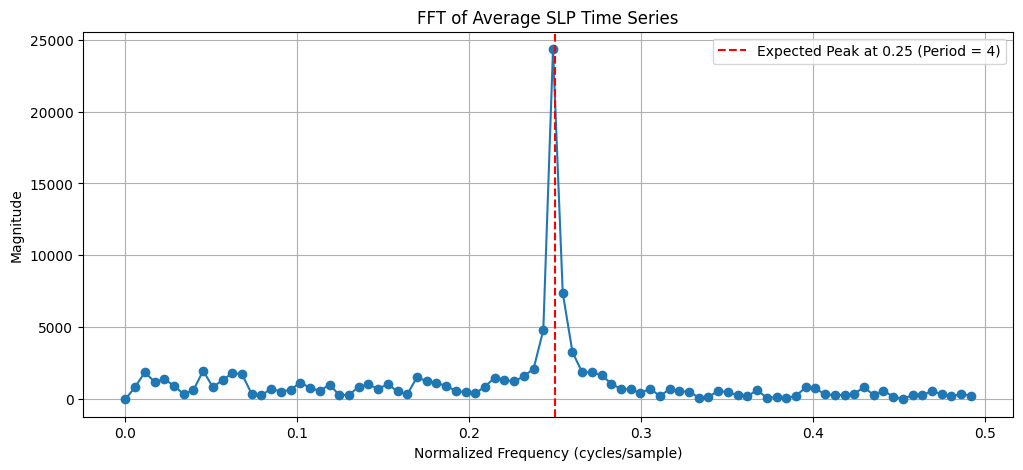

In [10]:
ds['time'] = ds.time.astype('datetime64[M]')
three_month_avg = ds.msl.resample(time="3ME").mean()
flattened = three_month_avg.stack(points=('latitude', 'longitude')).transpose('points', 'time')
df_final = flattened.to_pandas()

avg_slp_series = df_final.mean(axis=0).values
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(avg_slp_series)), avg_slp_series, marker='o')
plt.xlabel('Data Point Index')
plt.ylabel('Average SLP')
plt.title('Average SLP Time Series (177 Points)')
plt.grid()
plt.show()

detrended_avg = avg_slp_series - np.mean(avg_slp_series)
fft_result = np.fft.fft(detrended_avg)
freqs = np.fft.fftfreq(len(fft_result), d=1)  
magnitude = np.abs(fft_result)
plt.figure(figsize=(12, 5))
plt.plot(freqs[:len(freqs)//2], magnitude[:len(freqs)//2], marker='o')
plt.axvline(x=0.25, color='r', linestyle='--', label='Expected Peak at 0.25 (Period = 4)')
plt.xlabel('Normalized Frequency (cycles/sample)')
plt.ylabel('Magnitude')
plt.title('FFT of Average SLP Time Series')
plt.legend()
plt.grid()
plt.show()


### Checking For Linearity and Non-Linearity

c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


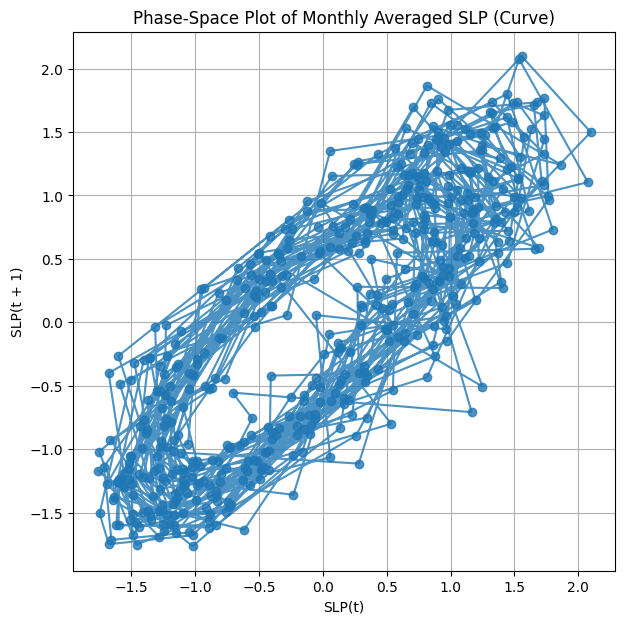

In [10]:
monthly_mean = ds.msl.resample(time='1M').mean()
spatial_avg = monthly_mean.mean(dim=['latitude', 'longitude'])
detrended = signal.detrend(spatial_avg.values)
normalized = (detrended - np.mean(detrended)) / np.std(detrended)
tau = 1  # Lag of 1 month
plt.figure(figsize=(7, 7))
plt.plot(normalized[:-tau], normalized[tau:], linestyle='-', marker='o', alpha=0.8)
plt.xlabel(f'SLP(t)')
plt.ylabel(f'SLP(t + {tau})')
plt.title('Phase-Space Plot of Monthly Averaged SLP (Curve)')
plt.grid()
plt.show()

c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


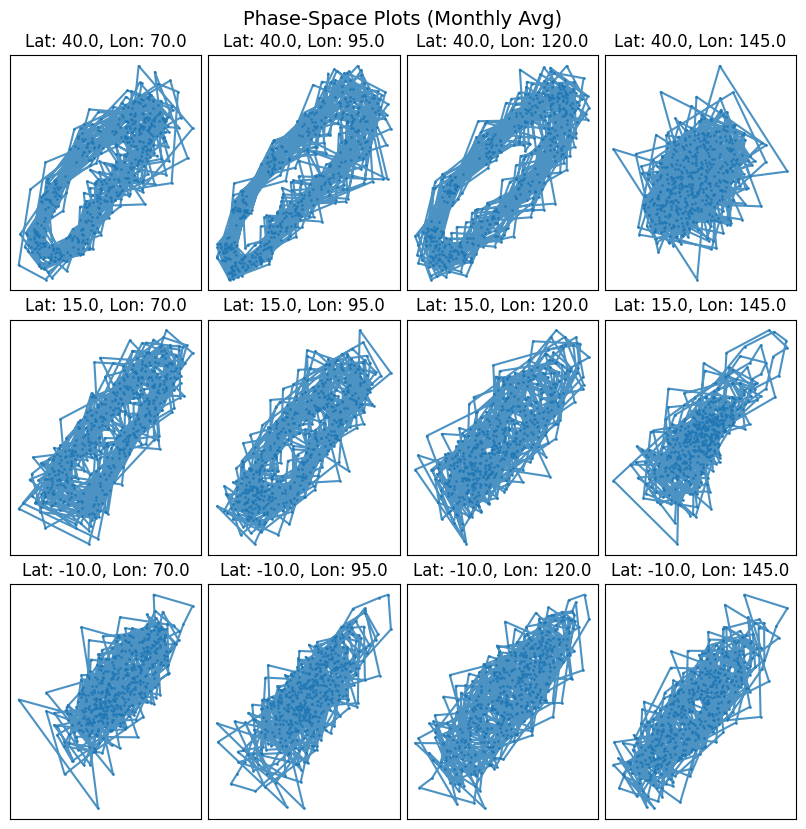

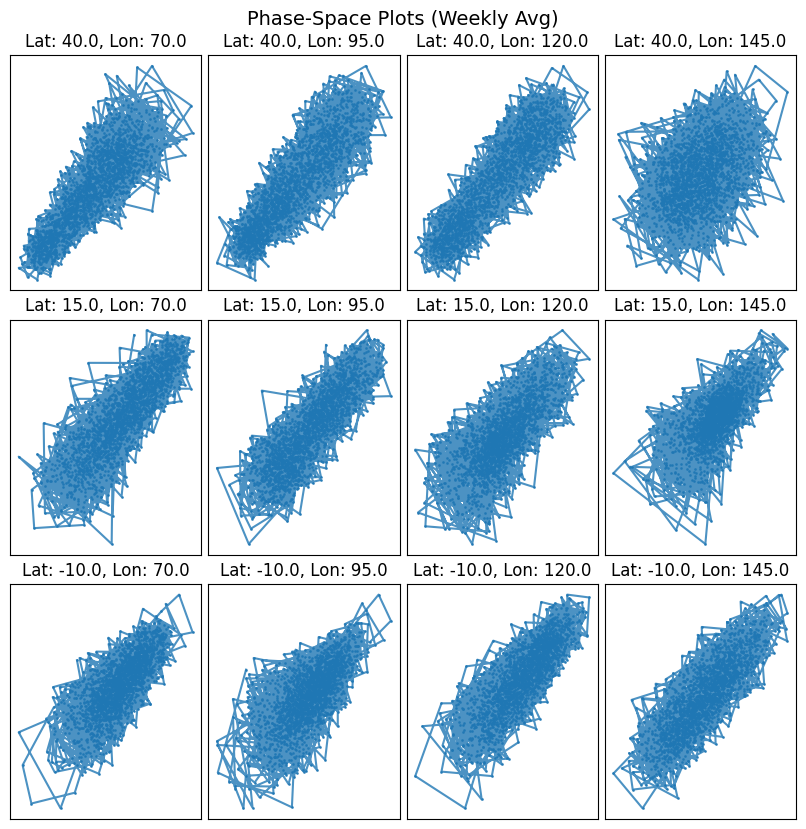

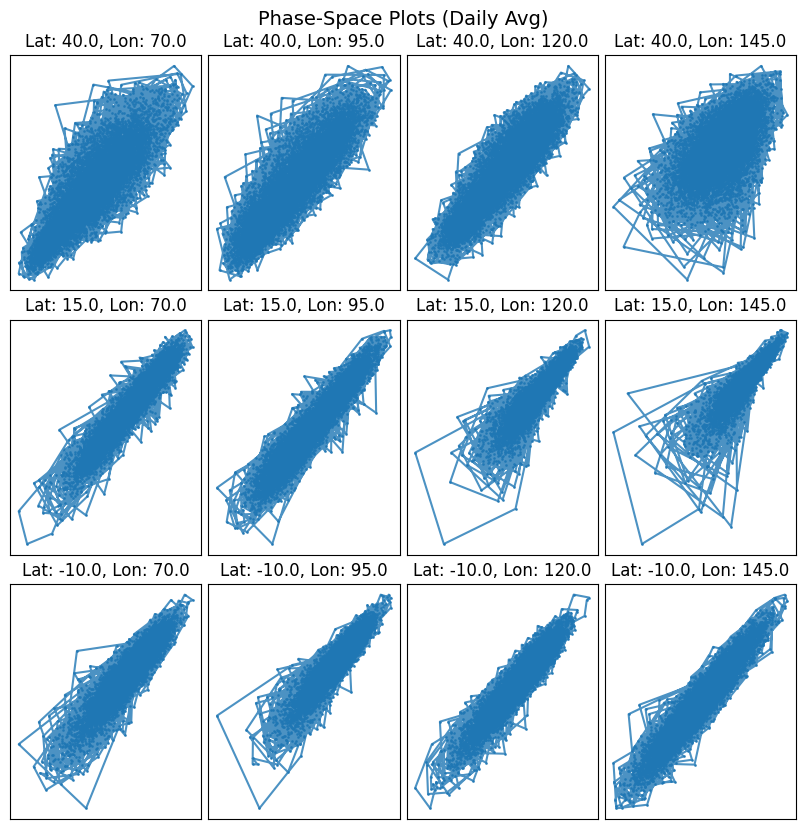

In [11]:
lat_vals = ds.latitude.values
lon_vals = ds.longitude.values
selected_lats = lat_vals[::50]  # Select every 50th latitude
selected_lons = lon_vals[::50]  # Select every 50th longitude

# Temporal scales: Monthly, Weekly, Daily
temporal_scales = {
    "Monthly": ds.msl.resample(time="1M").mean().dropna(dim='time'),
    "Weekly": ds.msl.resample(time="1W").mean().dropna(dim='time'),
    "Daily": ds.msl.dropna(dim='time'),
}

# Create phase-space plots for each temporal scale
for scale_name, scale_data in temporal_scales.items():
    fig, axs = plt.subplots(len(selected_lats), len(selected_lons), figsize=(8, 8))
    
    for i, lat in enumerate(selected_lats):
        for j, lon in enumerate(selected_lons):
            # Extract SLP time series at (lat, lon)
            point_slp = scale_data.sel(latitude=lat, longitude=lon, method="nearest").values
            
            # Normalize (NO detrending for simplicity)
            normalized = (point_slp - np.mean(point_slp)) / np.std(point_slp)
            
            # Phase-Space Plot with lag τ=1
            tau = 1  # Lag of 1 time step (depends on temporal scale)
            axs[i, j].plot(normalized[:-tau], normalized[tau:], linestyle="-", marker=".", markersize=2, alpha=0.8)
            axs[i, j].set_title(f"Lat: {lat:.1f}, Lon: {lon:.1f}")
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])

    # Adjust layout and add a title for the current temporal scale
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Reduce space between subplot
    plt.tight_layout(pad=0.5)  # Adjust padding
    plt.suptitle(f"Phase-Space Plots ({scale_name} Avg)", fontsize=14, y=1.02)
    plt.show()

### SVD and DMD

(16261, 528)
Number of modes to retain 99% of energy: 14


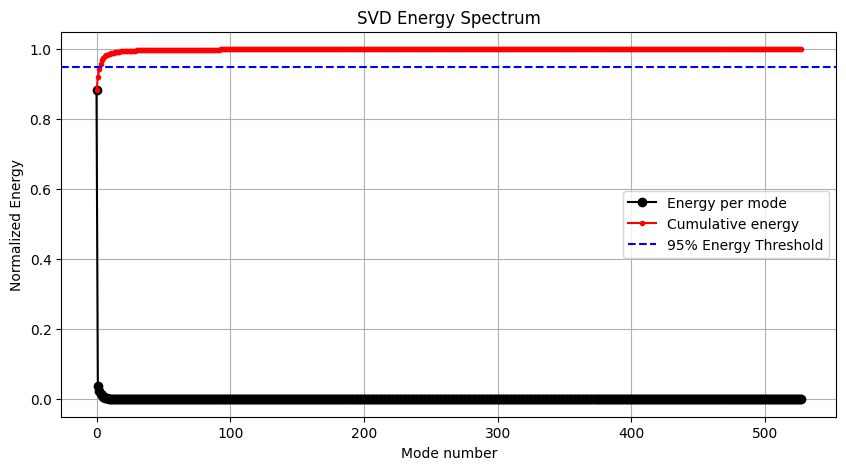

In [12]:
X = monthly_mean.values
X_reshaped = X.reshape(528, -1).T
print(X_reshaped.shape)

X_centered = X_reshaped - X_reshaped.mean(axis=1, keepdims=True)
U, S, Vh = np.linalg.svd(X_centered, full_matrices=False)

energy = S**2
energy_ratio = energy / np.sum(energy)
cumulative_energy = np.cumsum(energy_ratio)

r99 = np.argmax(cumulative_energy >= 0.99) + 1
print(f"Number of modes to retain 99% of energy: {r99}")

plt.figure(figsize=(10,5))
plt.plot(energy_ratio, 'ko-', label='Energy per mode')
plt.plot(cumulative_energy, 'r.-', label='Cumulative energy')
plt.axhline(0.95, color='b', linestyle='--', label='95% Energy Threshold')
plt.xlabel('Mode number')
plt.ylabel('Normalized Energy')
plt.title('SVD Energy Spectrum')
plt.legend()
plt.grid(True)
plt.show()

1980-1989: 60 modes retain 99% of energy


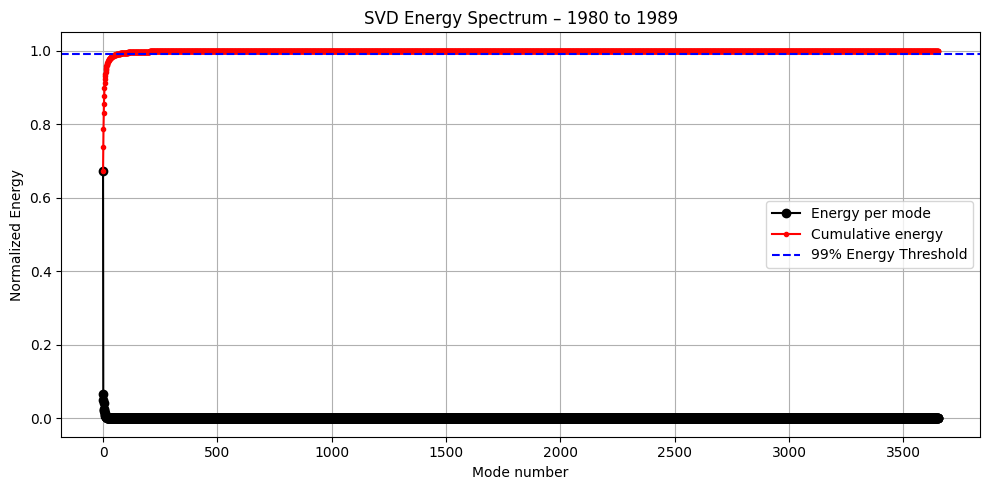

1990-1999: 61 modes retain 99% of energy


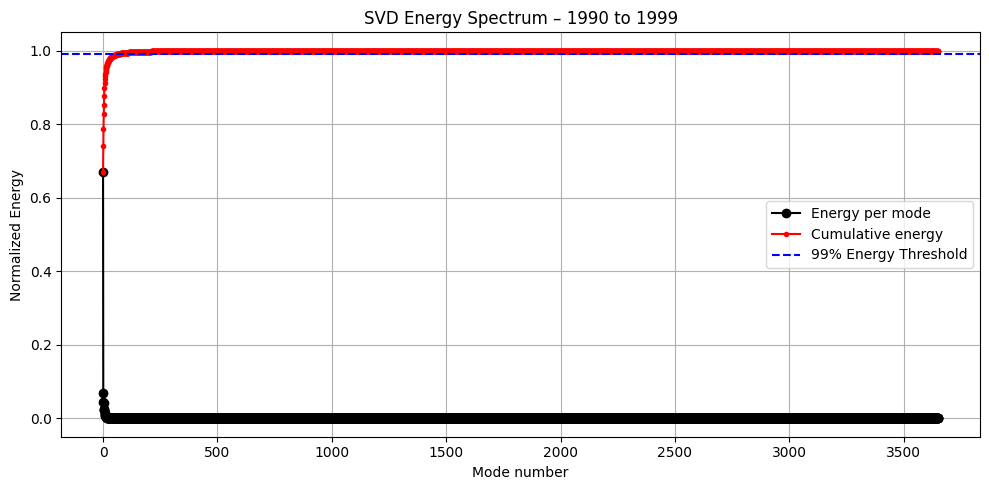

2000-2009: 61 modes retain 99% of energy


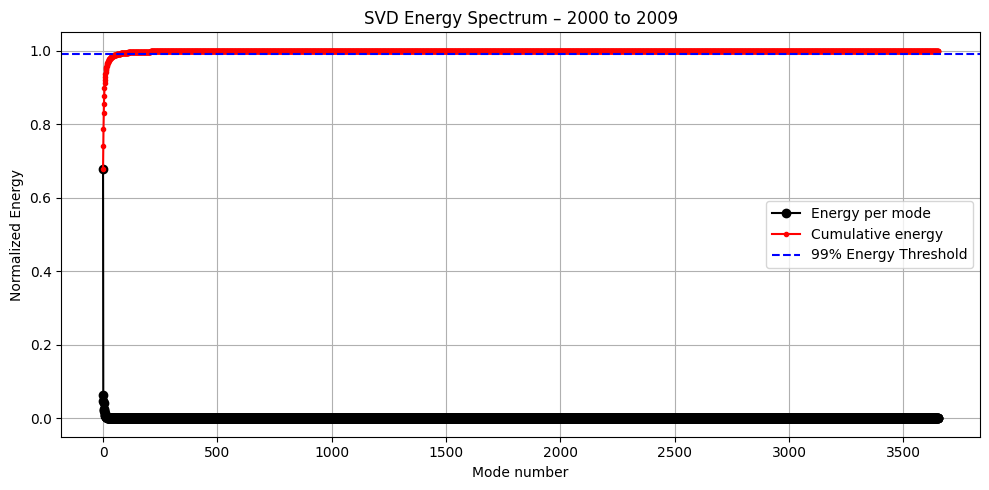

2010-2019: 64 modes retain 99% of energy


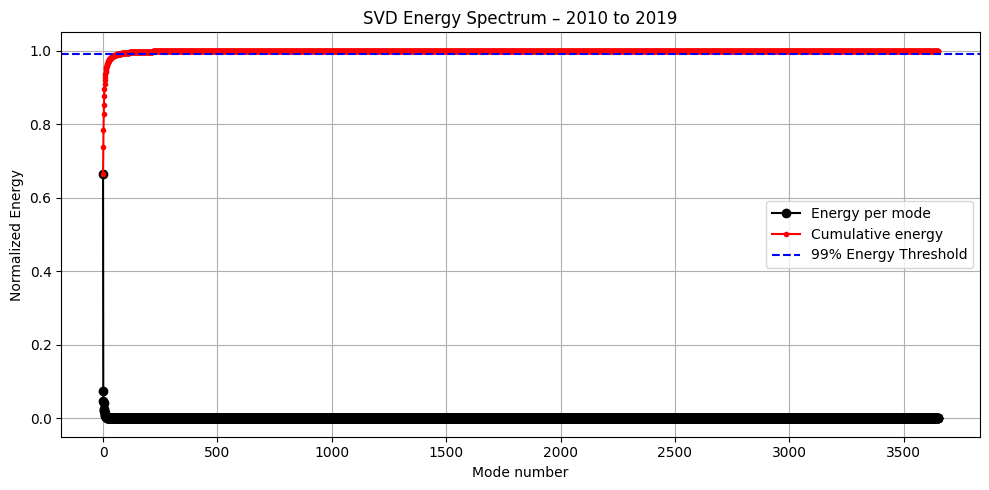

In [14]:
def perform_svd_decade_analysis(dataarray, start_year, end_year):
    """
    Perform SVD on daily climate data for a decade.
    
    Parameters:
        dataarray (xarray.DataArray): Input variable, e.g., ds['msl']
        start_year (int): Start of the decade
        end_year (int): End of the decade (inclusive)

    Returns:
        r99 (int): Number of modes to retain 99% of the energy
    """
    # Select one decade
    slice_data = dataarray.sel(time=slice(f"{start_year}-01-01", f"{end_year}-12-31"))

    # Reshape and center
    X = slice_data.values  # shape: (days, lat, lon)
    X_reshaped = X.reshape(X.shape[0], -1).T  # shape: (space, time)
    X_centered = X_reshaped - X_reshaped.mean(axis=1, keepdims=True)

    # SVD
    U, S, Vh = np.linalg.svd(X_centered, full_matrices=False)

    # Energy spectrum
    energy = S**2
    energy_ratio = energy / np.sum(energy)
    cumulative_energy = np.cumsum(energy_ratio)

    # Find number of modes for 99% energy
    r99 = np.argmax(cumulative_energy >= 0.99) + 1
    print(f"{start_year}-{end_year}: {r99} modes retain 99% of energy")

    # Plot energy spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(energy_ratio, 'ko-', label='Energy per mode')
    plt.plot(cumulative_energy, 'r.-', label='Cumulative energy')
    plt.axhline(0.99, color='b', linestyle='--', label='99% Energy Threshold')
    plt.title(f"SVD Energy Spectrum – {start_year} to {end_year}")
    plt.xlabel('Mode number')
    plt.ylabel('Normalized Energy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return r99
var = ds['msl']
decades = [(1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019)]
r99_decades = {}
for start, end in decades:
    r99 = perform_svd_decade_analysis(var, start, end)
    r99_decades[f"{start}-{end}"] = r99

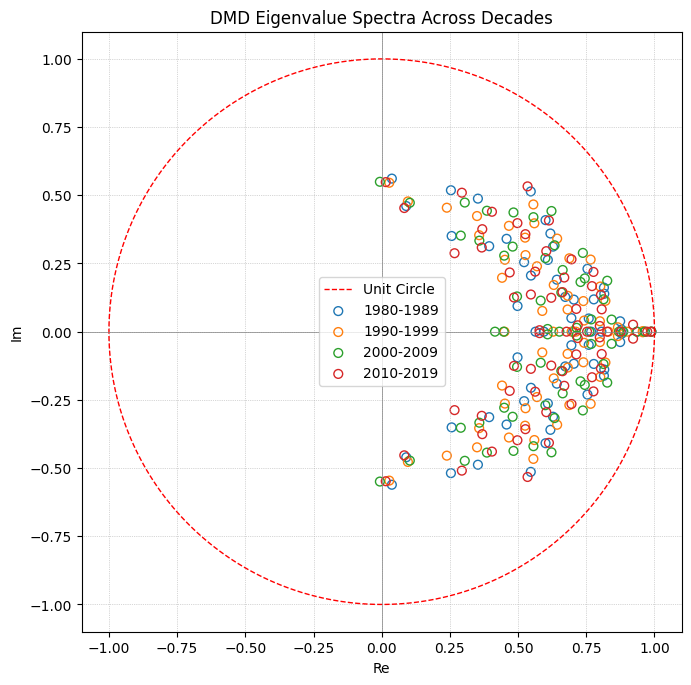

In [19]:
def perform_dmd_decade_analysis(dataarray, start_year, end_year, r):
    """
    Perform Dynamic Mode Decomposition (DMD) on daily climate data for a decade.

    Parameters:
        dataarray (xarray.DataArray): Input variable, e.g., ds['msl']
        start_year (int): Start of the decade
        end_year (int): End of the decade (inclusive)
        r (int): Number of modes to truncate to (e.g., from previous SVD result)

    Returns:
        eigs (np.ndarray): Eigenvalues of the reduced linear operator
    """

    # Slice and reshape
    slice_data = dataarray.sel(time=slice(f"{start_year}-01-01", f"{end_year}-12-31"))
    X = slice_data.values.reshape(slice_data.shape[0], -1).T  # shape: (space, time)
    X_centered = X - X.mean(axis=1, keepdims=True)

    # DMD setup
    X1 = X_centered[:, :-1]
    X2 = X_centered[:, 1:]

    # SVD
    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    U_r = U[:, :r]
    S_r = np.diag(S[:r])
    V_r = Vh[:r, :].T

    # Build low-rank Ã and compute eigenvalues
    A_tilde = U_r.T @ X2 @ V_r @ np.linalg.inv(S_r)
    eigs, _ = np.linalg.eig(A_tilde)

    # Plot Ritz values
    # theta = np.linspace(0, 2*np.pi, 100)
    # unit_circle = np.exp(1j * theta)

    # plt.figure(figsize=(6, 6))
    # plt.plot(unit_circle.real, unit_circle.imag, 'r--', linewidth=1, label='Unit Circle')
    # plt.scatter(eigs.real, eigs.imag, facecolors='none', edgecolors='k', s=40, label='Ritz values')
    # plt.axhline(0, color='gray', linewidth=0.5)
    # plt.axvline(0, color='gray', linewidth=0.5)
    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.grid(True, linestyle=':', linewidth=0.5)
    # plt.xlim(-1.1, 1.1)
    # plt.ylim(-1.1, 1.1)
    # plt.xlabel("Re")
    # plt.ylabel("Im")
    # plt.title(f"DMD Spectrum (Eigenvalues/Ritz Values)\n{start_year}-{end_year}")
    # plt.tight_layout()
    # plt.show()

    return eigs

dmd_eigs_decades = {}
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
plt.figure(figsize=(7, 7))
theta = np.linspace(0, 2 * np.pi, 300)
unit_circle = np.exp(1j * theta)
plt.plot(unit_circle.real, unit_circle.imag, 'r--', linewidth=1, label='Unit Circle')
for (start, end), color in zip(decades, colors):
    r = r99_decades[f"{start}-{end}"]  # use your stored r99
    eigs = perform_dmd_decade_analysis(var, start, end, r)
    dmd_eigs_decades[f"{start}-{end}"] = eigs
    plt.scatter(eigs.real, eigs.imag, facecolors='none', edgecolors=color, s=40, label=f"{start}-{end}")

plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("Re")
plt.ylabel("Im")
plt.title("DMD Eigenvalue Spectra Across Decades")
plt.legend()
plt.tight_layout()
plt.show()

### Future Prediciton using DMD

In [15]:
def dmd_forecast_and_evaluate(dataarray, train_start, train_end, predict_start, predict_end, r):
    # Prepare training data
    slice_data = dataarray.sel(time=slice(f"{train_start}-01-01", f"{train_end}-12-31"))
    X = slice_data.values.reshape(slice_data.shape[0], -1).T
    X_centered = X - X.mean(axis=1, keepdims=True)

    X1 = X_centered[:, :-1]
    X2 = X_centered[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    U_r, S_r, V_r = U[:, :r], np.diag(S[:r]), Vh[:r, :].T

    A_tilde = U_r.T @ X2 @ V_r @ np.linalg.inv(S_r)
    eigs, W = np.linalg.eig(A_tilde)
    Phi = X2 @ V_r @ np.linalg.inv(S_r) @ W

    # Initial condition
    x0 = X_centered[:, -1]
    b = np.linalg.lstsq(Phi, x0, rcond=None)[0]

    # Time steps for forecast
    t_train = X.shape[1]
    n_pred_days = (np.datetime64(f"{predict_end}-12-31") - np.datetime64(f"{predict_start}-01-01")).astype(int) + 1

    time_dynamics = np.zeros((r, n_pred_days), dtype=complex)
    for i in range(n_pred_days):
        time_dynamics[:, i] = b * eigs**(t_train + i)

    X_dmd_forecast = Phi @ time_dynamics
    X_dmd_forecast_real = X_dmd_forecast.real + X.mean(axis=1, keepdims=True)

    # Reshape prediction to (days, lat, lon)
    pred_shape = dataarray.sel(time=slice(f"{predict_start}-01-01", f"{predict_end}-12-31")).shape
    X_dmd_forecast_reshaped = X_dmd_forecast_real.T.reshape(pred_shape)

    # Ground truth
    actual = dataarray.sel(time=slice(f"{predict_start}-01-01", f"{predict_end}-12-31")).values

    # Compute RMSE
    rmse = np.sqrt(np.mean((actual - X_dmd_forecast_reshaped)**2))
    print(f"RMSE for {predict_start}-{predict_end} prediction: {rmse:.4f}")

    return actual, X_dmd_forecast_reshaped

# Predict using the 2010-2019 decade
r = r99_decades["2010-2019"]
var = ds['msl']
actual_vals, predicted_vals = dmd_forecast_and_evaluate(var, 2010, 2019, 2020, 2022, r)


RMSE for 2020-2022 prediction: 472.4298


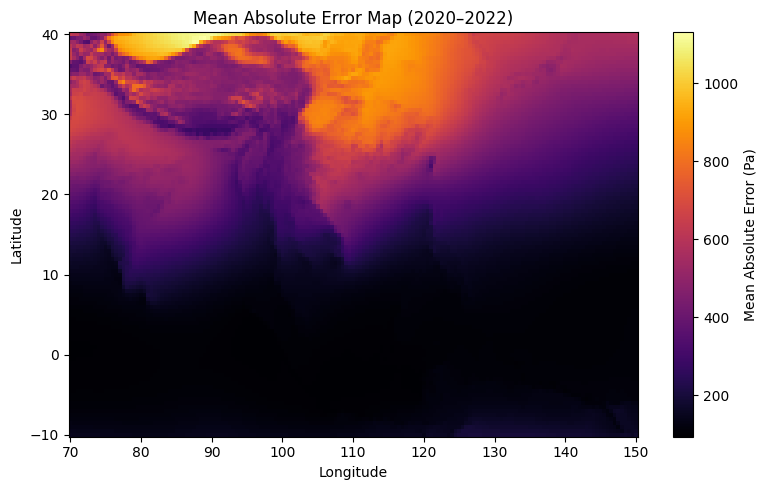

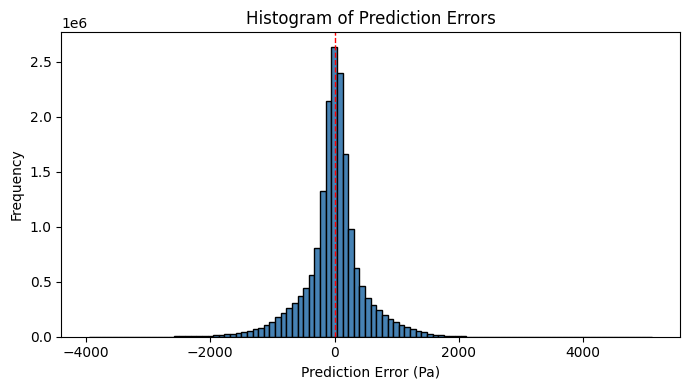

In [20]:
# --- Mean Absolute Error Map ---
abs_error = np.abs(predicted_vals - actual_vals)         # shape: (days, lat, lon)
mean_abs_error_map = np.mean(abs_error, axis=0)          # shape: (lat, lon)

lat_vals = ds['latitude'].values
lon_vals = ds['longitude'].values

plt.figure(figsize=(8, 5))
plt.pcolormesh(lon_vals, lat_vals, mean_abs_error_map, cmap='inferno', shading='auto')
plt.colorbar(label='Mean Absolute Error (Pa)')
plt.title('Mean Absolute Error Map (2020–2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()



# --- Histogram of Prediction Errors ---
errors = (predicted_vals - actual_vals).flatten()

plt.figure(figsize=(7, 4))
plt.hist(errors, bins=100, color='steelblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error (Pa)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

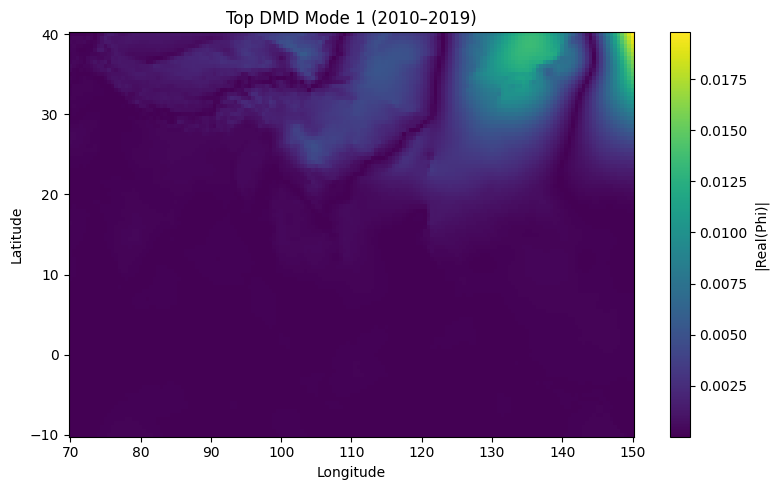

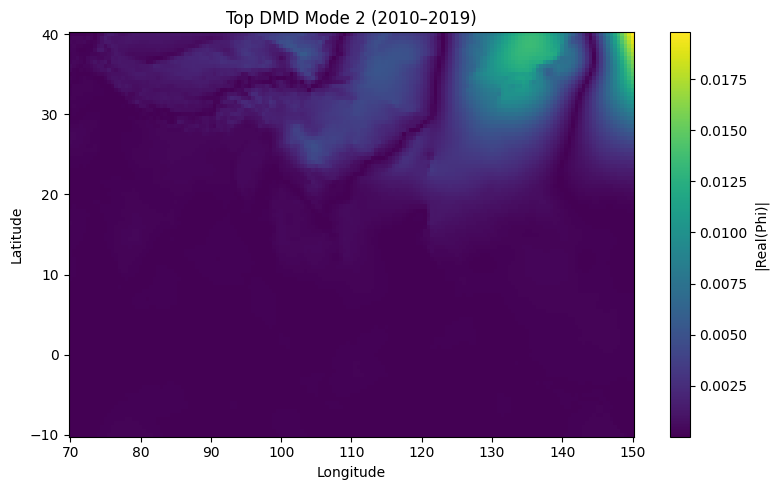

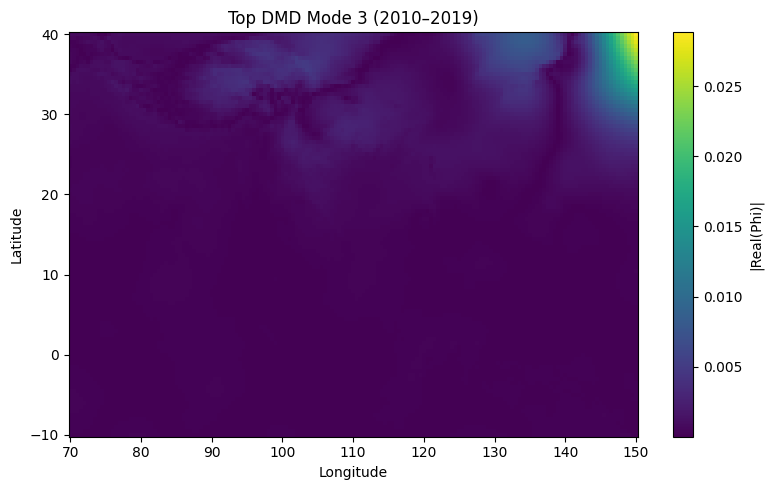

In [21]:
# Redo the DMD decomposition to extract Phi
slice_data = var.sel(time=slice("2010-01-01", "2019-12-31"))
X = slice_data.values.reshape(slice_data.shape[0], -1).T
X_centered = X - X.mean(axis=1, keepdims=True)

X1 = X_centered[:, :-1]
X2 = X_centered[:, 1:]

U, S, Vh = np.linalg.svd(X1, full_matrices=False)
r = r99_decades["2010-2019"]
U_r, S_r, V_r = U[:, :r], np.diag(S[:r]), Vh[:r, :].T

A_tilde = U_r.T @ X2 @ V_r @ np.linalg.inv(S_r)
eigs, W = np.linalg.eig(A_tilde)
Phi = X2 @ V_r @ np.linalg.inv(S_r) @ W  # shape: (space, r)

# Extract coordinate info
n_lat = var.sizes['latitude']
n_lon = var.sizes['longitude']
lat_vals = ds['latitude'].values
lon_vals = ds['longitude'].values

# Plot top 3 DMD modes (magnitude of real part)
for i in range(3):
    mode_i = np.abs(Phi[:, i].real).reshape((n_lat, n_lon))

    plt.figure(figsize=(8, 5))
    plt.pcolormesh(lon_vals, lat_vals, mode_i, cmap='viridis', shading='auto')
    plt.colorbar(label='|Real(Phi)|')
    plt.title(f'Top DMD Mode {i+1} (2010–2019)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()
